<a href="https://colab.research.google.com/github/Developerdeepak13/AI-ML-projects/blob/main/mnist_digit_classificaiton.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. Preparing the Dataset

In [1]:
from tensorflow.keras.datasets import mnist
import tensorflow as tf
from tensorflow.keras.utils import to_categorical

import numpy as np

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

train_images=np.stack([train_images]*3,axis=-1)/255.0
test_images=np.stack([test_images]*3,axis=-1)/255.0

train_images=tf.image.resize(train_images,(32,32))
test_images=tf.image.resize(test_images,(32,32))

train_labels = to_categorical(train_labels, 10)
test_labels = to_categorical(test_labels, 10)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


2. Building the Model

In [2]:
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import Input, GlobalAveragePooling2D, Dense
from tensorflow.keras.models import Model

base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(32, 32, 3))
base_model.trainable = False  # Freeze base model

inputs = Input(shape=(32, 32, 3))
x = base_model(inputs, training=False)
x = GlobalAveragePooling2D()(x)
outputs = Dense(10, activation='softmax')(x)
model = Model(inputs, outputs)

/tmp/ipython-input-3104373990.py:5: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(32, 32, 3))


9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


3. Compiling and Training the Model

In [3]:
model.compile(optimizer='adam', loss='categorical_crossentropy',
metrics=['accuracy'])
model.fit(train_images, train_labels, epochs=10, validation_split=0.2)

Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 29s 10ms/step - accuracy: 0.4599 - loss: 1.8354 - val_accuracy: 0.6057 - val_loss: 1.2996
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.6135 - loss: 1.2500 - val_accuracy: 0.6405 - val_loss: 1.1402
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.6392 - loss: 1.1302 - val_accuracy: 0.6554 - val_loss: 1.0732
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.6459 - loss: 1.0809 - val_accuracy: 0.6610 - val_loss: 1.0376
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.6519 - loss: 1.0456 - val_accuracy: 0.6659 - val_loss: 1.0154
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.6585 - loss: 1.0317 - val_accuracy: 0.6682 - val_loss: 1.0003
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.6629 - loss: 1.0096 - val_accuracy: 0.6689 - val_loss: 0.9909
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.6667 - loss: 

4. Fine-Tuning the Model

In [4]:
base_model.trainable = True
for layer in base_model.layers[:100]:
    layer.trainable = False

model.compile(optimizer=tf.keras.optimizers.Adam(1e-5), loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(train_images, train_labels, epochs=5, validation_split=0.2)

Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 36s 11ms/step - accuracy: 0.2271 - loss: 10.7167 - val_accuracy: 0.1551 - val_loss: 11.5489
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 14s 9ms/step - accuracy: 0.4826 - loss: 2.5616 - val_accuracy: 0.3142 - val_loss: 2.2359
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 14s 9ms/step - accuracy: 0.6135 - loss: 1.4915 - val_accuracy: 0.6641 - val_loss: 1.0869
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 14s 9ms/step - accuracy: 0.7023 - loss: 1.0437 - val_accuracy: 0.8106 - val_loss: 0.6707
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 14s 9ms/step - accuracy: 0.7596 - loss: 0.8163 - val_accuracy: 0.8536 - val_loss: 0.5065


In [5]:
loss, accuracy = model.evaluate(test_images, test_labels)
print(f"Test loss: {loss}")
print(f"Test accuracy: {accuracy}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 14s 35ms/step - accuracy: 0.8343 - loss: 0.5647
Test loss: 0.522666871547699
Test accuracy: 0.8472999930381775


6. Visualizing Model Performance

313/313 ━━━━━━━━━━━━━━━━━━━━ 9s 18ms/step


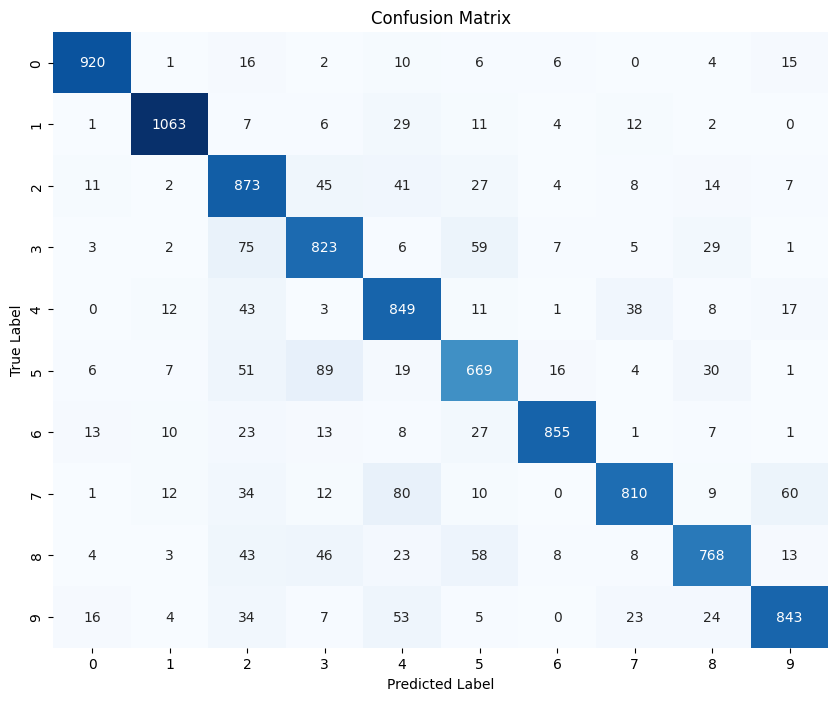

In [6]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

test_predictions = model.predict(test_images)
test_predictions_classes = np.argmax(test_predictions, axis=1)
test_true_classes = np.argmax(test_labels, axis=1)

cm = confusion_matrix(test_true_classes, test_predictions_classes)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

7. Sample Image Visualization

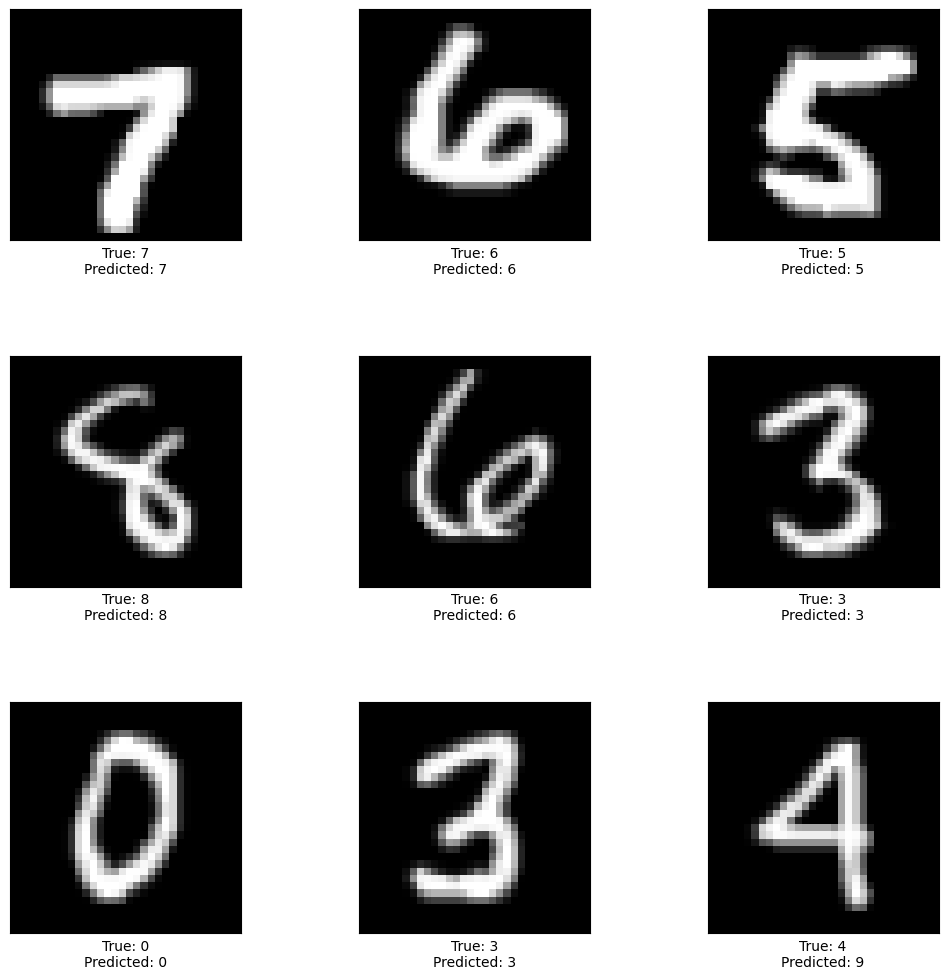

In [7]:
def display_sample(sample_images, sample_labels, sample_predictions):
    fig, axes = plt.subplots(3, 3, figsize=(12, 12))
    fig.subplots_adjust(hspace=0.5, wspace=0.5)

    for i, ax in enumerate(axes.flat):
        ax.imshow(sample_images[i].reshape(32, 32), cmap='gray')
        ax.set_xlabel(f"True: {sample_labels[i]}\nPredicted: {sample_predictions[i]}")
        ax.set_xticks([])
        ax.set_yticks([])

    plt.show()

test_images_gray = np.dot(test_images[...,:3], [0.2989, 0.5870, 0.1140])

random_indices = np.random.choice(len(test_images_gray), 9, replace=False)
sample_images = test_images_gray[random_indices]
sample_labels = test_true_classes[random_indices]
sample_predictions = test_predictions_classes[random_indices]
display_sample(sample_images, sample_labels, sample_predictions)